# Data Science Exploration of Physics Concepts using Linear Regression

# Questions to Answer

1. What is Interpolation?  

2. What is Extrapolation?  

3. What is Linear-Regression?  

4. What is the Stone-Weistrass theorem?

Answers:


1. Interpolation is the method of ESTIMATING unknown data points that theoretically can be found between our discrete distribution of the set of known data points. 

2. On the other hand, extrapolation is the method of ESTIMATING unknown data points that cannot be found in the known distribution of our set of data points. I understand it like trying to get an outlier.

3. Interpolation and extrapolation differ in various points such as how enough is our set of known data points: while in interpolation our known universe is sufficient, with extrapolation we could need to expand our set of known data points. Also, with interpolation there is a bigger degree of certainty than with extrapolation on how correct is our estimation.

4. Linear-Regression is a type of linear model that fits the data points by estimating the linear relation between them. The method it generally employs is the sum of squared distances.

5. It is a mathematical result that states that any given function defined in a space can always be approximated by polynomial functions. This space has to satisfy compactness (every collection of sets that covers the space contains a finite collection of subsets that covers the space) and Hausdorfness (every distinct points in the space can be separated by disjoint sets of the space). 

## Objective


Investigate the application and limitations of linear regression in estimating physical constants, focusing on data science techniques rather than deep physics knowledge.


## Your Task

Your task is to explore these relationships from a data science perspective, focusing on how linear regression performs in each case.

## Tools

Python with libraries for data analysis and visualization (e.g., pandas, numpy, matplotlib, seaborn, sklearn)

## Background for Data Scientists


We'll explore two physics scenarios:




### The Photoelectric Effect:

When light shines on certain materials, electrons are emitted. This is called the photoelectric effect.  
The maximum kinetic energy (K) of emitted electrons is related to the frequency of light (f) by the equation:

$ K = hf - φ $

Here, **h** is Planck's constant (a fundamental constant of nature), and **φ** is the work function (a property of the material).  
This relationship is linear, with **h** as the slope and **-φ** as the y-intercept.



### The Simple Pendulum:

A simple pendulum is a weight hanging from a string that swings back and forth.  
The time it takes for one complete swing (the period, T) is related to the length of the pendulum (L) by the equation:

$ T = 2\pi\sqrt{\frac{L}{g}} $

Here, **g** is the acceleration due to gravity (approximately 9.8 m/s² on Earth).  
This relationship is not linear due to the square root.


# Data Generation

## The Photoelectric Effect (Linear Relationship):

### a. Choose your parameters:

- **h (Planck's constant):** Use the actual value, $( 6.626 \times 10^{-34} ) J⋅s$
- **φ (work function):** Choose a value between $( 1 \times 10^{-19})$ and $( 5 \times 10^{-19} ) J$

### b. Generate data:

1. **Create an array of 50 frequency (f) values** between $( 1 \times 10^{14} )$ and $( 1 \times 10^{15} )$ Hz.
2. **Calculate the corresponding K values** using the equation $( K = hf - φ )$.
3. **Add random noise to K values** to simulate experimental uncertainty. Use numpy's random module to add Gaussian noise with a standard deviation of about 1-5% of the K values.

### Python snippet to get you started:


In [14]:
import numpy as np

# Set your parameters
h = 6.626e-34  # Planck's constant in J⋅s
phi = 1.10e-19 # Choose a value for the work function

# Generate frequency values
f = np.linspace(1e14, 1e15, 50)

# Calculate K values
K = h * f - phi
# Add noise
noise_level = 0.01 # Choose a value between 0.01 and 0.05
K_with_noise = K + np.random.normal(0, (noise_level * np.abs(K)), K.shape)

## The Simple Pendulum (Non-linear Relationship):

### a. Choose your parameters:

- **g (acceleration due to gravity):** Use 9.8 m/s²

### b. Generate data:

1. **Create an array of 50 length (L) values** between $(0.1)$ and $(2)$ meters.
2. **Calculate the corresponding T values** using the equation $(T = 2\pi\sqrt{\frac{L}{g}})$.
3. **Add random noise to T values** to simulate experimental uncertainty. Use numpy's random module to add Gaussian noise with a standard deviation of about 1-5% of the T values.


In [15]:
import numpy as np

# Set your parameters
g = 9.8  # acceleration due to gravity in m/s²

# Generate length values
L = np.linspace(0.1, 2, 50)

# Calculate T values
T = 2 * np.pi * np.sqrt(L / g)

# Add noise
noise_level = 0.01 # Choose a value between 0.01 and 0.05
T_with_noise = T + np.random.normal(0, noise_level * T, T.shape)

For both scenarios:

Create pandas DataFrames to store your generated data.
Visualize your data using scatter plots. Use matplotlib or seaborn for this.
Examine your plots. How do they differ? What do these differences suggest about the underlying relationships?

Remember, while we're providing a structure for data generation, you should experiment with different noise levels and ranges to understand how these choices affect your subsequent analysis.

In [17]:
import pandas as pd

# Create the Photoelectric effect DataFrame
ph_df=pd.DataFrame({'Frequency (Hz)':f, 'K (J)':K_with_noise})

# Create the Pendulum DataFrame
pe_df=pd.DataFrame({'Length (m)':L, 'Period (s)':T_with_noise})

In [19]:
ph_df

,Frequency (Hz),K (J)
0,1.000000e+14,-4.358837e-20
1,1.183673e+14,-3.159864e-20
2,1.367347e+14,-1.950359e-20
3,1.551020e+14,-7.154769e-21
4,1.734694e+14,4.840242e-21
5,1.918367e+14,1.737912e-20
6,2.102041e+14,2.893252e-20
7,2.285714e+14,4.144536e-20
8,2.469388e+14,5.433333e-20
9,2.653061e+14,6.533931e-20


In [20]:
pe_df

,Length (m),Period (s)
0,0.100000,0.638363
1,0.138776,0.742534
2,0.177551,0.849240
3,0.216327,0.941904
4,0.255102,1.016307
5,0.293878,1.086763
6,0.332653,1.167924
7,0.371429,1.233336
8,0.410204,1.286296
9,0.448980,1.322680


# Part II: Linear Regression Application
For both scenarios:

1. Plot the Data (matplotlib & seaborn)
2. Apply linear regression to your data. (use sklearn)
3. Visualize the regression line alongside your data points. (matplotlib & seaborn)
4. Extract the slope and intercept. What do these represent in each scenario? (what is the slope?)



## Questions to consider:

+ How well does the linear model fit each dataset?
+ What metrics could you use to quantify the goodness of fit?
+ For the pendulum data, is linear regression appropriate? If not, why?

### Plot Data 

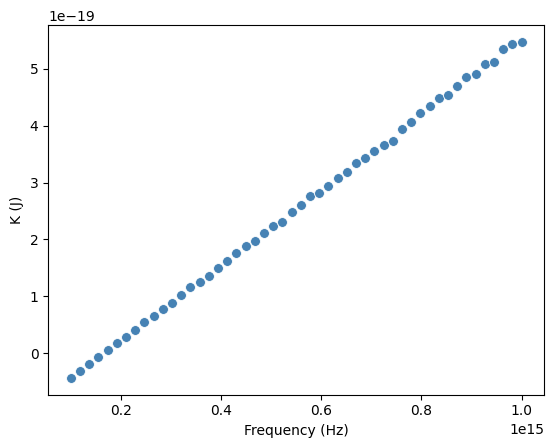

In [23]:
### Plot Visualizations of the Photoelectric Data
import matplotlib.pyplot as plt
import seaborn as sns

g_ph=sns.scatterplot(data=ph_df, 
                  x='Frequency (Hz)', 
                  y='K (J)',
                  color='steelblue',
                  s=50)

g.set_title('Photoelectric Effect')
g.set_xlabel('Frequency (Hz)')
g.set_ylabel('K (J)')
plt.show()





Text(0.5, 1.0, 'Simple Pendulum Movement')

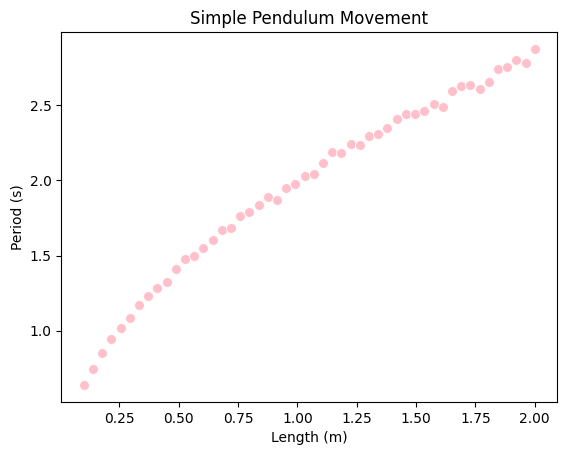

In [97]:
### Plot VIsualizations for the Pendulum Movement

g_pe=sns.scatterplot(data=pe_df,
                    x='Length (m)',
                    y='Period (s)',
                    color='pink',
                    s=50)

g_pe.set_title('Simple Pendulum Movement')

### Regression

In [49]:
# Regression for Photelectric Effect
from sklearn.linear_model import LinearRegression

ph_reg = LinearRegression().fit(ph_df[['Frequency (Hz)']], ph_df['K (J)'])

In [94]:
# Regression for Pendulum

from sklearn.linear_model import LinearRegression

pe_reg = LinearRegression().fit(pe_df[['Length (m)']], pe_df['Period (s)'])





### Visualization of the Regression Results

/home/giancarlo_dlra/miniconda3/envs/chatbots/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


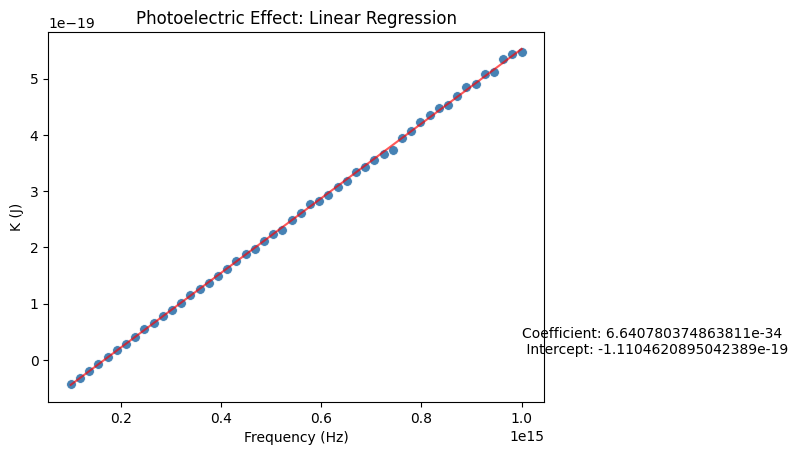

In [117]:
### Code for visualizing regression results (Photoelectric)
g_ph = sns.scatterplot(data=ph_df,
                          x='Frequency (Hz)',
                          y='K (J)',
                          color='steelblue',
                          s=50)
# Plot the regression line
g_ph.plot(f, ph_reg.predict(f.reshape(-1, 1)), 
          color='red',
          alpha=0.65)

g_ph.set_title('Photoelectric Effect: Linear Regression')
g_ph.set_xlabel('Frequency (Hz)')
g_ph.set_ylabel('K (J)')
g_ph.text(x=1e15, y=1e-20, s=f'Coefficient: {ph_reg.coef_[0]}\n Intercept: {ph_reg.intercept_}', color='black')   
plt.show()



/home/giancarlo_dlra/miniconda3/envs/chatbots/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


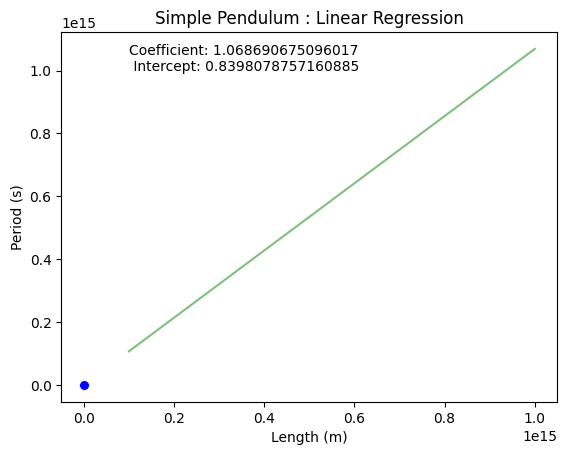

In [111]:
### Code for visualizing regression results (Pendulum)
g_pe=sns.scatterplot(data=pe_df,
                    x='Length (m)',
                    y='Period (s)',
                    color='blue',
                    s=50,
                    alpha=1)

# Plot the regression line

g_pe.plot(f, pe_reg.predict(f.reshape(-1, 1)), 
          color='green',
          alpha=0.50)

g_pe.set_title('Simple Pendulum : Linear Regression')
g_pe.set_xlabel('Length (m)')
g_pe.set_ylabel('Period (s)')
g_pe.text(x=1e14, y=1e15, s=f'Coefficient: {pe_reg.coef_[0]}\n Intercept: {pe_reg.intercept_}', color='black')   
plt.show()



